In [1]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_parquet('jobs_data.parquet')
df = dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_US = df[(df['job_country']=='United States')].dropna(subset=['salary_year_avg'])

In [4]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [5]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [11]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index 


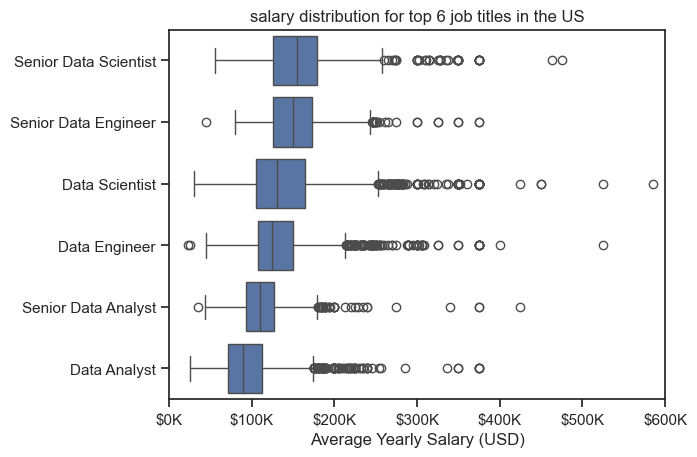

In [12]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short',order=job_order,)
sns.set_theme(style='ticks')

plt.title('salary distribution for top 6 job titles in the US')
plt.xlabel('Average Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()